In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("training_data.csv")
test_data = pd.read_csv("test_data.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [6]:
data.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


Como as colunas city_name e avg_precipitation possuem apenas 1 valor, podemos retirá-las, já que não vão ter nenhuma influência na previsão

In [7]:
data.nunique()



data2 = data.drop(['city_name', 'avg_precipitation'], axis=1)
test_data2 = test_data.drop(['city_name', 'avg_precipitation'], axis=1)

In [8]:
data.head(30)

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High
5,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,N101,N101,N101",2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,0.0,Sem Chuva,Medium
6,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,0.0,Sem Chuva,Low
7,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-14 23:00,DARK,16.0,1012.0,71.0,2.0,0.0,Sem Chuva,High
8,Guimaraes,UNDEFINED,1368,"N101,N101,N101,N101,N101,N101,N101,N101,N101,",2021-05-01 12:00,LIGHT,14.0,1017.0,67.0,5.0,0.0,Sem Chuva,Very_High
9,Guimaraes,MAJOR,10431,"N101,N101,N206,N105,N309,N309,N101,N101,IC5,N1...",2021-10-11 18:00,LIGHT,23.0,1018.0,40.0,0.0,0.0,Sem Chuva,Very_High


In [9]:
data2.isnull().sum()

magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_rain               0
incidents              0
dtype: int64

<AxesSubplot:>

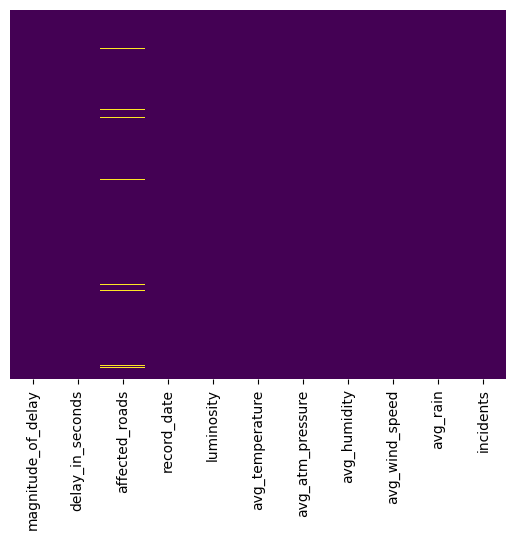

In [10]:
sns.heatmap(data2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

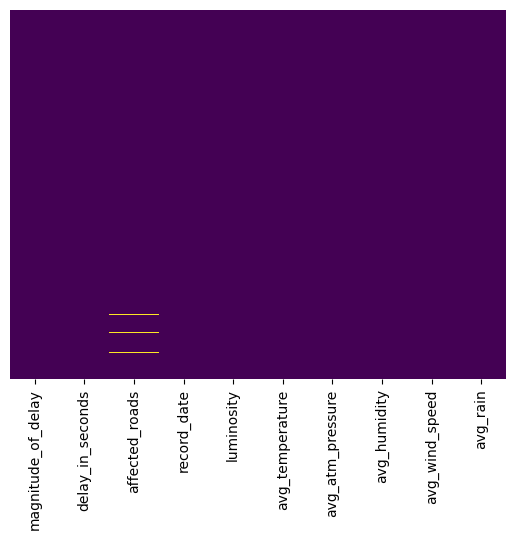

In [11]:
sns.heatmap(test_data2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
i = 0
data_roads = data2.copy()

#print(data2['affected_roads']).head(30)
all_roads = {}
for road_list in data_roads['affected_roads']:
    if type(road_list) == type(float(i)):
        #print("Iteração ::", i)
        data_roads.at[i, 'affected_roads'] = ","
    else: 
        road_list = str(road_list)
        if road_list != ",":
            roads = road_list.split(",")
            #print(roads)
            dic = {}
            
            for road in roads:
                #print(road)
                if road not in dic and road != "":
                    #print(road)
                    dic[road] = 0
                if road not in all_roads and road != "":
                    all_roads[road] = 0
            #data2['affected_roads'][i] = str(list(dic.keys()))
            data_roads.at[i, 'affected_roads'] = list(dic.keys())
            #print(list(dic.keys()))
    i = i + 1
print("Nº de estradas :: ", len(all_roads))
print("Estradas :: ", list(all_roads.keys()))


i = 0

test_data_roads = test_data2.copy()

#print(data2['affected_roads']).head(30)
all_roads_test = {}
for road_list in test_data_roads['affected_roads']:
    if type(road_list) == type(float(i)):
        #print("Iteração ::", i)
        test_data_roads.at[i, 'affected_roads'] = ","
    else: 
        road_list = str(road_list)
        if road_list != ",":
            roads = road_list.split(",")
            #print(roads)
            dic = {}
            
            for road in roads:
                #print(road)
                if road not in dic and road != "":
                    #print(road)
                    dic[road] = 0
                if road not in all_roads_test and road != "":
                    all_roads_test[road] = 0
            #data2['affected_roads'][i] = str(list(dic.keys()))
            test_data_roads.at[i, 'affected_roads'] = list(dic.keys())
            #print(list(dic.keys()))
    i = i + 1
print("Nº de estradas :: ", len(all_roads_test))
print("Estradas :: ", list(all_roads_test.keys()))



Nº de estradas ::  10
Estradas ::  ['N101', 'R206', 'N105', 'N206', 'N309', 'IC5', 'N310', 'N207-4', 'IC5 - N206', 'EM579']
Nº de estradas ::  10
Estradas ::  ['N101', 'R206', 'N105', 'N309', 'IC5', 'N206', 'EM579', 'N310', 'N101 - N310', 'N207-4']


In [13]:
data_roads.head(30)

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,UNDEFINED,385,[N101],2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,"[N101, R206, N105]",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,[N101],2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High
5,UNDEFINED,0,[N101],2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,Medium
6,UNDEFINED,0,[N101],2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,Low
7,UNDEFINED,0,[N101],2021-04-14 23:00,DARK,16.0,1012.0,71.0,2.0,Sem Chuva,High
8,UNDEFINED,1368,[N101],2021-05-01 12:00,LIGHT,14.0,1017.0,67.0,5.0,Sem Chuva,Very_High
9,MAJOR,10431,"[N101, N206, N105, N309, IC5]",2021-10-11 18:00,LIGHT,23.0,1018.0,40.0,0.0,Sem Chuva,Very_High


In [14]:
for road in all_roads:
    data_roads[road] = 0

for road in all_roads_test:
    test_data_roads[road] = 0
#data2.head(30)

In [15]:
test_data_roads.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,N101,R206,N105,N309,IC5,N206,EM579,N310,N101 - N310,N207-4
0,UNDEFINED,1211,[N101],2021-04-13 19:00,LIGHT,15.0,1018.0,80.0,0.0,Sem Chuva,0,0,0,0,0,0,0,0,0,0
1,UNDEFINED,0,[N101],2021-10-13 04:00,DARK,16.0,1018.0,41.0,2.0,Sem Chuva,0,0,0,0,0,0,0,0,0,0
2,UNDEFINED,0,[N101],2021-07-18 19:00,LIGHT,22.0,1017.0,71.0,0.0,Sem Chuva,0,0,0,0,0,0,0,0,0,0
3,UNDEFINED,140,"[N101, R206]",2021-10-30 15:00,LIGHT,18.0,1008.0,81.0,3.0,Sem Chuva,0,0,0,0,0,0,0,0,0,0
4,UNDEFINED,0,[N101],2021-10-18 10:00,LIGHT,20.0,1022.0,86.0,0.0,Sem Chuva,0,0,0,0,0,0,0,0,0,0


In [16]:
i = 0
for reg in data_roads:
    list = data_roads.at[i, 'affected_roads']
    for road in list:
        if road != ",":
            data_roads.at[i, road] = 1
    i = i + 1


i = 0
for reg in test_data_roads:
    list = test_data_roads.at[i, 'affected_roads']
    for road in list:
        if road != ",":
            test_data_roads.at[i, road] = 1
    i = i + 1

In [17]:
print(test_data_roads.columns)

Index(['magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_rain', 'N101', 'R206', 'N105',
       'N309', 'IC5', 'N206', 'EM579', 'N310', 'N101 - N310', 'N207-4'],
      dtype='object')


<AxesSubplot:>

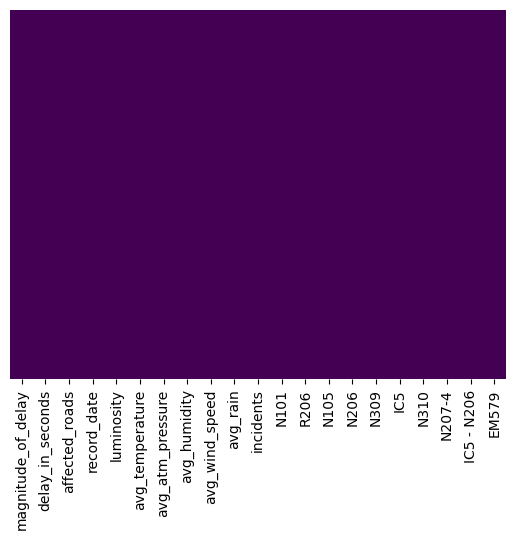

In [18]:
data3 = data_roads.dropna()
sns.heatmap(data_roads.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Como os valores dos incidentes, a nossa label, são categóricos, estes não poderão ser submetidos à maioria dos modelos de ML disponíveis. Assim, teremos de convertê-los para valores numéricos

In [19]:
replace_map = {'incidents' : {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High':4}}

data4 = data3.replace(replace_map)
data4.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,...,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,...,0,0,0,0,0,0,0,0,0,0
1,UNDEFINED,385,[N101],2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,...,1,0,0,0,0,0,0,0,0,0
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,...,0,0,0,0,0,0,0,0,0,0
3,MAJOR,2297,"[N101, R206, N105]",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,...,1,1,1,0,0,0,0,0,0,0
4,UNDEFINED,0,[N101],2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,...,1,0,0,0,0,0,0,0,0,0


Como podemos ver, agora o tipo do feature Incidents é numérico

In [20]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  5000 non-null   object 
 1   delay_in_seconds    5000 non-null   int64  
 2   affected_roads      5000 non-null   object 
 3   record_date         5000 non-null   object 
 4   luminosity          5000 non-null   object 
 5   avg_temperature     5000 non-null   float64
 6   avg_atm_pressure    5000 non-null   float64
 7   avg_humidity        5000 non-null   float64
 8   avg_wind_speed      5000 non-null   float64
 9   avg_rain            5000 non-null   object 
 10  incidents           5000 non-null   int64  
 11  N101                5000 non-null   int64  
 12  R206                5000 non-null   int64  
 13  N105                5000 non-null   int64  
 14  N206                5000 non-null   int64  
 15  N309                5000 non-null   int64  
 16  IC5   

Agora vamos tratar das datas

In [21]:
data4['record_date'].head()

0    2021-03-15 23:00
1    2021-12-25 18:00
2    2021-03-12 15:00
3    2021-09-29 09:00
4    2021-06-13 11:00
Name: record_date, dtype: object

In [22]:
data4['record_date'] = pd.to_datetime(data4['record_date'], format = "%Y-%m-%d %H:%M", errors='coerce')
assert data4['record_date'].isnull().sum() == 0, 'missing record date'
data4['record_date'].head()

test_data_roads['record_date'] = pd.to_datetime(test_data_roads['record_date'], format = "%Y-%m-%d %H:%M", errors='coerce')

In [23]:
data4['record_date_year'] = data4['record_date'].dt.year
data4['record_date_month'] = data4['record_date'].dt.month
data4['record_date_day'] = data4['record_date'].dt.day
data4['record_date_hour'] = data4['record_date'].dt.hour
data4['record_date_minute'] = data4['record_date'].dt.minute

test_data_roads['record_date_year'] = test_data_roads['record_date'].dt.year
test_data_roads['record_date_month'] = test_data_roads['record_date'].dt.month
test_data_roads['record_date_day'] = test_data_roads['record_date'].dt.day
test_data_roads['record_date_hour'] = test_data_roads['record_date'].dt.hour
test_data_roads['record_date_minute'] = test_data_roads['record_date'].dt.minute


data4.head()
test_data_roads.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,...,N206,EM579,N310,N101 - N310,N207-4,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute
0,UNDEFINED,1211,[N101],2021-04-13 19:00:00,LIGHT,15.0,1018.0,80.0,0.0,Sem Chuva,...,0,0,0,0,0,2021,4,13,19,0
1,UNDEFINED,0,[N101],2021-10-13 04:00:00,DARK,16.0,1018.0,41.0,2.0,Sem Chuva,...,0,0,0,0,0,2021,10,13,4,0
2,UNDEFINED,0,[N101],2021-07-18 19:00:00,LIGHT,22.0,1017.0,71.0,0.0,Sem Chuva,...,0,0,0,0,0,2021,7,18,19,0
3,UNDEFINED,140,"[N101, R206]",2021-10-30 15:00:00,LIGHT,18.0,1008.0,81.0,3.0,Sem Chuva,...,0,0,0,0,0,2021,10,30,15,0
4,UNDEFINED,0,[N101],2021-10-18 10:00:00,LIGHT,20.0,1022.0,86.0,0.0,Sem Chuva,...,0,0,0,0,0,2021,10,18,10,0


In [24]:
data4.nunique()

TypeError: unhashable type: 'list'

Aqui podemos verificar que o ano dos incidentes, bem como o minuto, são features com um único valor, sendo então essa informação inútil.

In [27]:
data5 = data4.drop(['record_date_minute','record_date_year', 'record_date', 'affected_roads'], axis = 1)
test_data3 = test_data_roads.drop(['record_date_minute','record_date_year', 'record_date', 'affected_roads'], axis = 1)
print(data5['magnitude_of_delay'].unique())
print(data5['luminosity'].unique())
print(data5['avg_rain'].unique())
#data5.info()

['UNDEFINED' 'MAJOR' 'MODERATE']
['DARK' 'LIGHT' 'LOW_LIGHT']
['Sem Chuva' 'chuva moderada' 'chuva fraca' 'chuva forte']


A 'magnitude_of_delay' tem 3 valores possíveis: UNDEFINED, MAJOR e MODERATE <br>
A luminosidade tem 3 valores possíveis: LIGHT, LOW_LIGHT, DARK <br>
A 'avg_rain' tem 4 valores possíveis: Sem Chuva, chuva moderada, chuva fraca, chuva forte <br>
Assim, teremos de transformar estes valores em valores numéricos, fazendo label enconding


In [29]:
replace_map = { 'magnitude_of_delay' : {'UNDEFINED': 0, 'MODERATE': 1, 'MAJOR': 2}, 
                'luminosity': {'DARK': 0, 'LIGHT': 1, 'LOW_LIGHT': 2},
                'avg_rain': {'Sem Chuva': 0, 'chuva moderada': 1, 'chuva fraca': 2, 'chuva forte': 3}
              }
data6 = data5.replace(replace_map)
test_data4 = test_data3.replace(replace_map)

data6.head()
#test_data4.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,N101,...,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579,record_date_month,record_date_day,record_date_hour
0,0,0,0,12.0,1013.0,70.0,1.0,0,0,0,...,0,0,0,0,0,0,0,3,15,23
1,0,385,0,12.0,1007.0,91.0,1.0,0,0,1,...,0,0,0,0,0,0,0,12,25,18
2,0,69,1,14.0,1025.0,64.0,0.0,0,1,0,...,0,0,0,0,0,0,0,3,12,15
3,2,2297,1,15.0,1028.0,75.0,1.0,0,4,1,...,0,0,0,0,0,0,0,9,29,9
4,0,0,1,27.0,1020.0,52.0,1.0,0,3,1,...,0,0,0,0,0,0,0,6,13,11


Depois de feita toda a etapa de feature engineering, vamos agora construir um modelo de RNA.

In [36]:
df = data6
df_test = test_data4

X = df.drop('incidents', axis=1)
y = df[['incidents']]
X_test = df_test
X.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,N101,R206,...,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579,record_date_month,record_date_day,record_date_hour
0,0,0,0,12.0,1013.0,70.0,1.0,0,0,0,...,0,0,0,0,0,0,0,3,15,23
1,0,385,0,12.0,1007.0,91.0,1.0,0,1,0,...,0,0,0,0,0,0,0,12,25,18
2,0,69,1,14.0,1025.0,64.0,0.0,0,0,0,...,0,0,0,0,0,0,0,3,12,15
3,2,2297,1,15.0,1028.0,75.0,1.0,0,1,1,...,0,0,0,0,0,0,0,9,29,9
4,0,0,1,27.0,1020.0,52.0,1.0,0,1,0,...,0,0,0,0,0,0,0,6,13,11


Modelo de RNA

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV,KFold,train_test_split
from sklearn.preprocessing import MinMaxScaler

RANDOM_SEED = 2021

2022-11-20 17:29:14.917750: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [66]:
scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X)
scaler_Y = MinMaxScaler(feature_range=(0,1)).fit(y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
y_scaled = pd.DataFrame(scaler_Y.transform(y[y.columns]), columns=y.columns)

scaler_test_X = MinMaxScaler(feature_range=(0,1)).fit(X_test)
X_scaled_test = pd.DataFrame(scaler_test_X.transform(X_test[X_test.columns]), columns=X_test.columns)


In [41]:
X_scaled.describe()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,N101,R206,...,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579,record_date_month,record_date_day,record_date_hour
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,0.136400,0.018035,0.269700,0.399500,0.604143,0.728245,0.125350,0.030933,0.003200,0.000200,...,0.000200,0.000200,0.000200,0.0,0.0,0.0,0.0,0.557418,0.496280,0.495861
std,0.342664,0.054270,0.284127,0.141780,0.147839,0.183028,0.126985,0.138814,0.056484,0.014142,...,0.014142,0.014142,0.014142,0.0,0.0,0.0,0.0,0.312921,0.291158,0.300452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.294118,0.514286,0.606383,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.272727,0.233333,0.217391
50%,0.000000,0.000000,0.500000,0.382353,0.628571,0.765957,0.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.545455,0.500000,0.478261
75%,0.000000,0.007528,0.500000,0.500000,0.714286,0.893617,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.818182,0.733333,0.739130
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y_scaled, test_size=0.2,
                                                    random_state=RANDOM_SEED)

In [43]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = ""
def build_model(activation='relu', learning_rate=0.01):
    #Create a sequential model (with three layers - last one is the output)
    model = Sequential()
    model.add(Dense(16, input_dim=21, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation='relu'))
    
    #Compile the model
    #Define the loss function, the otimizer and metrics to be used
    model.compile(
        loss = 'mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mse'])
    return model

In [87]:
model = build_model()
model.summary()

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_240 (Dense)           (None, 16)                352       
                                                                 
 dense_241 (Dense)           (None, 8)                 136       
                                                                 
 dense_242 (Dense)           (None, 1)                 9         
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [72]:
TUNING_DICT = {
    'activation' : ['relu'],
    'learning_rate' : [0.001,0.0001]
}

In [94]:
kf = KFold(n_splits=5,shuffle=True,random_state=RANDOM_SEED)

model = KerasRegressor(build_fn=build_model,epochs=50,batch_size=32)

grid_search = GridSearchCV(estimator = model,
                           param_grid=TUNING_DICT,
                           cv=kf,
                           scoring='neg_mean_absolute_error',
                           refit='True',
                           verbose=1)

grid_search.fit(X_train,Y_train,validation_split=0.2)




Fitting 5 folds for each of 2 candidates, totalling 10 fits
Epoch 1/50


/usr/local/anaconda3/envs/pls/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


80/80 [==============================] - 1s 4ms/step - loss: 0.3722 - mse: 0.2778 - val_loss: 0.3524 - val_mse: 0.2548
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3718 - mse: 0.2770 - val_loss: 0.3465 - val_mse: 0.2414
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2864 - mse: 0.1339 - val_loss: 0.2422 - val_mse: 0.0982
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2390 - mse: 0.0973 - val_loss: 0.2352 - val_mse: 0.0946
Epoch 5/50
80/80 [==============================] - 0s 3ms/step - loss: 0.2320 - mse: 0.0934 - val_loss: 0.2300 - val_mse: 0.0880
Epoch 6/50
80/80 [==============================] - 0s 3ms/step - loss: 0.2245 - mse: 0.0871 - val_loss: 0.2246 - val_mse: 0.0860
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2165 - mse: 0.0829 - val_loss: 0.2161 - val_mse: 0.0793
Epoch 8/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2091 - mse: 0.0777 - val_lo

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f92114053c8>,
             param_grid={'activation': ['relu'],
                         'learning_rate': [0.001, 0.0001]},
             refit='True', scoring='neg_mean_absolute_error', verbose=1)

In [95]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

for mean, stdev, param in zip(means,stds,params):
    print("%f (%f) with %r" % (mean, stdev,param))

Best: -0.121289 using {'activation': 'relu', 'learning_rate': 0.001}
-0.121289 (0.004236) with {'activation': 'relu', 'learning_rate': 0.001}
-0.229452 (0.007740) with {'activation': 'relu', 'learning_rate': 0.0001}


In [96]:
#nunca mais correr!
model1 = grid_search.best_estimator_

In [56]:
model2 = grid_search.best_estimator_

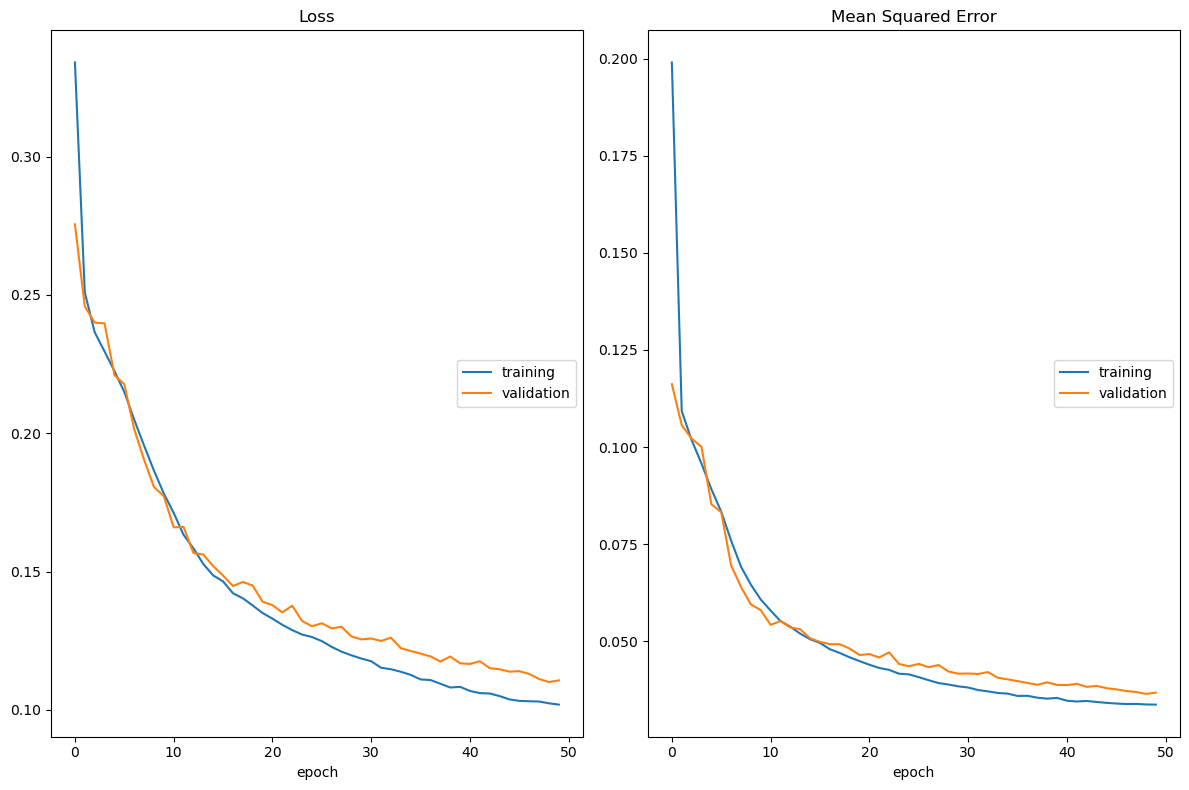

Loss
	training         	 (min:    0.102, max:    0.334, cur:    0.102)
	validation       	 (min:    0.110, max:    0.276, cur:    0.111)
Mean Squared Error
	training         	 (min:    0.034, max:    0.199, cur:    0.034)
	validation       	 (min:    0.036, max:    0.116, cur:    0.037)
125/125 [==============================] - 1s 4ms/step - loss: 0.1019 - mse: 0.0337 - val_loss: 0.1107 - val_mse: 0.0368


In [99]:
from livelossplot import PlotLossesKerasTF

model1.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),
callbacks=[PlotLossesKerasTF()],verbose=1)


In [108]:
predictions = model1.predict(X_test)
predictions = predictions.reshape(predictions.shape[0],1)
print(predictions[:20])

predictions_dt = scaler_Y.inverse_transform(predictions)
#predictions_dt[:5]

32/32 [==============================] - 0s 907us/step
[[1.0158377 ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.7185098 ]
 [0.9888875 ]
 [0.9462391 ]
 [1.0222819 ]
 [0.        ]
 [0.6464557 ]
 [0.8611893 ]
 [0.50954616]
 [0.13309059]
 [1.0405047 ]
 [0.5206541 ]
 [0.5075063 ]
 [0.75686216]
 [0.77034813]
 [0.        ]
 [0.        ]]


In [104]:
#replace_map = {'incidents' : {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High':4}}

outcome = []
for i in range(len(predictions_dt)):
    if predictions_dt[i] == 0:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'None'})
    elif predictions_dt[i] == 1:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Low'})
    elif predictions_dt[i] == 2:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Medium'})
    elif predictions_dt[i] == 3:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'High'})
    elif predictions_dt[i] == 4:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Very_High'})
    
print(outcome)
od = pd.DataFrame(outcome)
od.to_csv("out_file.csv", index=False,header=True)

[{'RowId': 2, 'Incidents': 'None'}, {'RowId': 3, 'Incidents': 'None'}, {'RowId': 4, 'Incidents': 'None'}, {'RowId': 9, 'Incidents': 'None'}, {'RowId': 19, 'Incidents': 'None'}, {'RowId': 20, 'Incidents': 'None'}, {'RowId': 22, 'Incidents': 'None'}, {'RowId': 25, 'Incidents': 'None'}, {'RowId': 27, 'Incidents': 'None'}, {'RowId': 28, 'Incidents': 'None'}, {'RowId': 29, 'Incidents': 'None'}, {'RowId': 30, 'Incidents': 'None'}, {'RowId': 31, 'Incidents': 'None'}, {'RowId': 32, 'Incidents': 'None'}, {'RowId': 37, 'Incidents': 'None'}, {'RowId': 38, 'Incidents': 'None'}, {'RowId': 39, 'Incidents': 'None'}, {'RowId': 40, 'Incidents': 'None'}, {'RowId': 42, 'Incidents': 'None'}, {'RowId': 43, 'Incidents': 'None'}, {'RowId': 46, 'Incidents': 'None'}, {'RowId': 47, 'Incidents': 'None'}, {'RowId': 48, 'Incidents': 'None'}, {'RowId': 49, 'Incidents': 'None'}, {'RowId': 52, 'Incidents': 'None'}, {'RowId': 53, 'Incidents': 'None'}, {'RowId': 56, 'Incidents': 'None'}, {'RowId': 61, 'Incidents': 'Non